# Final Exercise 6: Space Invaders Game

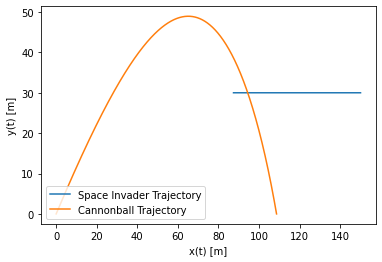

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sqrt, sin, cos
from scipy.constants import g
from scipy.integrate import odeint
from math import isclose

# CONSTANTS =============================================

C = 0.25 #Ns^2/m^4 

# Euler stuff

#Space Invader initial conditions
ys = 30.0   #m
xs = 150.0  #m
vxs = -10.0  #m/s

#Cannonball initial conditions
m     = 46/1000 #kg
D     = 43/1000 #m
theta = 50*pi/180 #rad #angle fired
vc    = 60.0    #m/s
vxc   = vc*cos(theta)
vyc   = vc*sin(theta)
c = C*D**2    #Ns^2/m^2, drag coefficient
#packing for odeint
initial_state = [vxc, vyc]
arguments = (g, m, c)

#time
npoints = 30000
t_end   = 15
#timeline
time = np.linspace(0, t_end, npoints)

#FUNCTIONS ========================================================================

def velocity_system(co_in, t, g, m, c):
    '''
    System of ODEs that describe quadratic drag:
    Keyword Arguments:
        co_in -- vx, vy input values
        t     -- time values
        g     -- constant gravity 
        m     -- constant mass of object
        c     -- constant C*D**2 of object (from object diam)
    returns:
        float, float, float -- projectile vx, vy at time
    '''
    vx, vy = co_in #unpacking
    dvxdt = -c/m*sqrt(vx**2 + vy**2)*vx #vx math
    dvydt = -g-c/m*sqrt(vx**2 + vy**2)*vy #vy math
    return dvxdt, dvydt

# MAGIC ========================================================================
# track velocity of the cannonball
vx, vy = odeint(velocity_system, initial_state, time, args=arguments).T 
#initial positions
x_space = xs
y_space = ys
x_ball  = 0
y_ball  = 0
#setting initial positions in list for plotting
space_x_position = [xs]
space_y_position = [ys]
ball_x_position = [0]
ball_y_position = [0]

dt = time[1] - time[0] #timestep

for index, t in enumerate(time): #loop to find the x,y position of space invader and cannonball
    #determine new positions per unit time
    x_ball += vx[index]*dt
    y_ball += vy[index]*dt
    x_space += vxs*dt
    if (isclose(x_ball, x_space, rel_tol=1e-2) and isclose(y_ball, y_space, rel_tol=1e-2)):
        #^ Isclose just tells us if we're close in a tolerance.
        # tolerance kept high to show that it really does miss. (2 sig figs)
        print('Space Invader has been shot down')
        print('Cannon ball position x=', x_ball, 'y=', y_ball)
        print('Space Invader position x=', x_space, 'y=', y_space)
    if (y_ball <0): #Don't go undeground
        # don't need any more entries past this point, cannonball already failed
        break 
    #add to lists
    space_x_position.append(x_space)
    space_y_position.append(y_space)
    ball_x_position.append(x_ball)
    ball_y_position.append(y_ball)

# PLOTS   ========================================================================

plt.plot(space_x_position, space_y_position, label="Space Invader Trajectory")
plt.plot(ball_x_position, ball_y_position, label="Cannonball Trajectory")
plt.xlabel("x(t) [m]")
plt.ylabel("y(t) [m]")
plt.legend()

# Results
Looking at the graph the cannonball and the space invader intercept their x/y once. However looking at the positions, they do this at x=~92, which the cannonball strikes at t=4.68s and the Space Invader reaches at t=~5.76s. So the cannonball misses the Space Invader by a full second. The Earth is clearly doomed.

